Hessian is a second derivatives of the error function with respect to the weights. Hessian is a matrix whose elements are given by

$$\frac{\partial^2 E}{\partial w_{ji}\partial w_{lk}} \tag{5.78}$$

where $w_{ji}$ and $w_{lk}$ are both the weights of the network. And the sub index $ji$ denotes the connection from unit $i$ of one layer to unit $j$ of another layer. The total number of weights is $W$. The number of elements of the Hessian matrix is therefore $W\times W$

The Hessian plays an inportant role in many aspects of neural computing, including the following:
1. `Several nonlinear optimization algorithms used for training neural networks are based on considerations of the second-order properties of the error surface, which are controlled by the Hessian matrix. (i.e. Newton-Raphson)`
2. The Hessian froms the basis of fast procedure for re-training a feed-forward network following a small change in the training data.
3. The inverse of the Hessian has been used to indentify the least significant weights in a network as part of network 'pruning' algorithms.
4. `The Hessian plays a central role in the Laplace approximation for a Bayesian neural network. Its inverse is used to determine the predictive distribution for a trained network, its eigenvalues determine the values of hypeparameters, and its determinant is used to evaluate the model evidence.`


---------------
# Diagonal approximation

This approximation neglects the non-diagonal elements of the Hessian for computational convenience. Because in more cases, we use the inverse of the Hessian, rather than the Hessian itself.

$$\mathbf{H} \simeq \begin{bmatrix}
\ddots &0 &0 &0 \\
0 &\frac{\partial^2 E_n}{\partial w_{ji}^2} &0 &0 \\
0 &0 &\ddots &0 \\
0 &0 &0 &\ddots
\end{bmatrix}$$

The diagonal elements can be written

$$\begin{align*}
\frac{\partial^2 E_n}{\partial w_{ji}^2} &= \frac{\partial^2 E_n}{\partial a_{j}^2}\frac{\partial^2 a_j}{\partial w_{ji}^2}\\
&= \color{red}{\frac{\partial^2 E_n}{\partial a_{j}^2}}z_i^2 \tag{5.79}\\
&= \frac{\partial}{\partial a_j}\frac{\partial E_n}{\partial a_{j}}z_i^2\\
&= \frac{\partial}{\partial a_j}\left(h'(a_j)\sum_{k}w_{kj}\delta_k\right) z_i^2 \qquad \frac{\partial E_n}{\partial a_{j}}=\delta_j=h'(a_j)\sum_{k}w_{kj}\delta_k\\
&= \frac{\partial}{\partial a_j}\left(h'(a_j)\sum_{k}w_{kj}\frac{\partial E_n}{\partial a_{k}}\right) z_i^2\\
&= \left\{\left(h'(a_j)\sum_{k}w_{kj}\frac{\partial}{\partial a_j}\frac{\partial E_n}{\partial a_{k}}\right)
+ \left(\frac{\partial h'(a_j)}{\partial a_j}\sum_{k}w_{kj}\frac{\partial E_n}{\partial a_{k}}\right)\right\}z_i^2\\
&= \left\{\left(h'(a_j)\sum_k w_{kj}\frac{\partial a_{k'}}{\partial a_j}\frac{\partial}{\partial a_{k'}}\frac{\partial E_n}{\partial a_k}\right)
+\left(h''(a_j)\sum_k w_{kj}\frac{\partial E_n}{\partial a_k}\right)\right\} z_i^2\\
&= \left\{\left(h'(a_j)^2\sum_k\sum_{k'}w_{kj}w_{k'j}\frac{\partial^2 E_n}{\partial a_k\partial a_{k'}}\right)
+\left(h''(a_j)\sum_k w_{kj}\frac{\partial E_n}{\partial a_k}\right)\right\} z_i^2 \tag{5.80}\\
&= \left\{ \left(h'(a_j)^2\sum_k w_{kj}^2\color{red}{\frac{\partial^2 E_n}{\partial a_k^2}} \right)
+ \left(h''(a_j)\sum_k w_{kj}\color{blue}{\frac{\partial E_n}{\partial a_k}}\right)\right\}z_i^2\qquad \text{neglect off-diagonal elements} \tag{5.81}
\end{align*}$$

We can use the backpropagation to evaluate these elements.


---------------

# Outer product approximation

## Regression

When neural networks are applied to regression problems, it is common to use a sum-of-squares error function of the form

$$E = \frac{1}{2}\sum_{n=1}^N (y_n-t_n)^2 \tag{5.82}$$

The Hessian matrix is therefore takes the form

$$\mathbf{H} = \nabla\big(\nabla E\big) = \nabla \left(\sum_{n=1}^N(y_n-t_n)\nabla y_n\right)
=\sum_{n=1}^N\nabla y_n\nabla y_n + \sum_{n=1}^N(y_n-t_n)\nabla\nabla y_n \tag{5.83}$$

Recall from Section 1.5.5 that the optimal function that minimizes a sum-of-squares loss is the conditional average of the target data. The quantity $(y_n-t_n)$ is then a random variable with zero mean. <font color='red'>If we assume that $y_n$ is close to the optimal function and its value is uncorrelated with $\nabla\nabla y_n$, then the second term of (5.83) will vanish.</font> The Hessian matrix is then given by

$$\mathbf{H}\simeq \sum_{n=1}^N \mathbf{b}_n\mathbf{b}_n^T \tag{5.84}$$

where $\mathbf{b}_n\equiv\nabla a_n$. Because the activation function here is $y_n = a_n$, it can be written that $\mathbf{b}_n = \nabla y_n$.

## Logistic regression
In the case of cross-entropy error function for a network with logistic sigmoid output-unit activation functions, the Hessian matrix is given by

$$\begin{align*}
\mathbf{H} &= \nabla \big(\nabla E\big)\\
&= \nabla \left(\sum_{n=1}^N \nabla E_n\right)\\
&= \nabla \left(\sum_{n=1}^N \frac{\partial E_n}{\partial a_n} \nabla a_n\right)\\
&= \nabla \left(\sum_{n=1}^N (y_n-t_n) \nabla a_n\right)\\
&= \left(\sum_{n=1}^N \nabla (y_n-t_n)\nabla a_n\right) + \left(\sum_{n=1}^N (y_n-t_n) \nabla \nabla a_n\right)\\
&= \left(\sum_{n=1}^N y_n(1-y_n)\nabla a_n\nabla a_n\right) + \left(\sum_{n=1}^N (y_n-t_n) \nabla \nabla a_n\right)
\end{align*}$$

the corresponding approximation is given by

$$\mathbf{H}\simeq \sum_{n=1}^N y_n(1-y_n)\mathbf{b}_n \mathbf{b}_n^T \tag{5.85}$$

where $\mathbf{b}_n\equiv\nabla a_n$.

An analogous result can be obtain for multiclass networks having softmax output unit activation functions.

--------------------
# Inverse Hessian

The outer-product approximation can be written as a sequential form

$$\mathbf{H}_{L+1} = \mathbf{H}_{L}+\mathbf{b}_{L+1}\mathbf{b}_{L+1}^T \tag{5.87}$$

And then use (C.7) to evaluate the inverse of the Hessian.

$$\mathbf{H}_{L+1}^{-1} = \mathbf{H}_{L}^{-1} - \frac{\mathbf{H}_L^{-1}\mathbf{b}_{L+1}\mathbf{b}_{L+1}^T\mathbf{H}_{L}^{-1}}{1+\mathbf{b}_{L+1}^T\mathbf{H}_L^{-1}\mathbf{b}_{L+1}} \tag{5.89}$$

In this way, data points are sequentially absorbed until $L+1 = N$ and the whole data set has been processed. The initial matrix $\mathbf{H}_0$ is chosen to be $\alpha \mathbf{I}$, where $\alpha$ is a small quantity.


-----------------

# Finite differences
There are two ways to evaluate the finite differences of the Hessian.

The first way is making use of the error only.

$$\frac{\partial^2 E}{\partial w_{ji}\partial w_{lk}} = \frac{1}{4\epsilon^2}\Big\{
E(w_{ji}+\epsilon, w_{lk}+\epsilon)-E(w_{ji}+\epsilon, w_{lk}-\epsilon)-E(w_{ji}-\epsilon, w_{lk}+\epsilon)+E(w_{ji}-\epsilon, w_{lk}-\epsilon)
\Big\} + O(\epsilon^2) \tag{5.90}$$

The second way is making use of the first-order derivatives of the error with respect to the weights.

$$\frac{\partial^2 E}{\partial w_{ji}\partial w_{lk}} = \frac{1}{2\epsilon} \left\{
\frac{\partial E}{\partial w_{ji}}(w_{lk}+\epsilon) - \frac{\partial E}{\partial w_{ji}}(w_{lk}-\epsilon)
\right\} + O(\epsilon^2) \tag{5.91}$$


---------------

# Exact evaluation of the Hessian

Consider the specific case of a network having two layers of weights, for which the required equations are easily derived. We shall use indices $i$ and $i'$ to denote inputs, indices $j$ and $j'$ to denote hidden units, and indices $k$ and $k'$ to denote outpus. 

We first define 

$$\delta_k = \frac{\partial E_n}{\partial a_k}\qquad M_{kk'}\equiv \frac{\partial^2 E_n}{\partial a_k\partial a_{k'}}=\frac{\partial\delta_k}{\partial a_{k'}} \tag{5.92}$$

1. Both weights in the second layer (output layer):
$$\begin{align*}
\frac{\partial^2 E_n}{\partial w_{kj}^{(2)}\partial w_{k'j'}^{(2)}} 
&= \frac{\partial}{\partial w_{k'j'}^{(2)}}\frac{\partial E_n}{\partial w_{kj}^{(2)}}\\
&= \frac{\partial}{\partial w_{k'j'}^{(2)}}\frac{\partial E_n}{\partial a_k}\frac{\partial a_k}{\partial w_{kj}^{(2)}}\\
&= \frac{\partial \delta_k}{\partial w_{k'j'}^{(2)}}z_j\\
&= \frac{\partial \delta_k}{\partial a_{k'}}\frac{\partial a_{k'}}{\partial w_{k'j'}^{(2)}}z_j\\
&= z_jz_{j'}M_{kk'} \tag{5.93}
\end{align*}$$

2. Both weights in the first layer:
$$\begin{align*}
\frac{\partial^2 E_n}{\partial w_{ji}^{(1)}\partial w_{j'i'}^{(1)}} 
&= \frac{\partial}{\partial w_{j'i'}^{(1)}}\frac{\partial E_n}{\partial w_{ji}^{(1)}}\\
&= \frac{\partial}{\partial w_{j'i'}^{(1)}}\sum_{k}\frac{\partial E_n}{\partial a_k}\frac{\partial a_k}{\partial a_j}\frac{\partial a_j}{\partial w_{ji}^{(1)}}\qquad \text{multivariable chain rule}\\
&= \frac{\partial}{\partial w_{j'i'}^{(1)}}\sum_{k}\delta_k \cdot w_{kj}^{(2)}h'(a_j) \cdot x_i\\
&= \sum_{k}\frac{\partial \delta_k}{\partial w_{j'i'}^{(1)}} \cdot w_{kj}^{(2)}h'(a_j) \cdot x_i + \sum_{k} \delta_k \cdot \frac{\partial}{\partial w_{j'i'}^{(1)}} w_{kj}^{(2)}h'(a_j) \cdot x_i\\
&= \sum_{k}\sum_{k'}\frac{\partial \delta_k}{\partial a_{k'}}\frac{\partial a_{k'}}{\partial a_{j'}}\frac{\partial a_{j'}}{\partial w_{j'i'}^{(1)}} \cdot w_{kj}^{(2)}h'(a_j) \cdot x_i 
+ \sum_{k} \delta_k \cdot w_{kj}^{(2)} \frac{\partial h'(a_j)}{\partial a_{j'}}\frac{\partial a_{j'}}{\partial w_{j'i'}^{(1)}} \cdot x_i\\
&= \sum_{k}\sum_{k'}M_{kk'} w_{k'j'}^{(2)} h'(a_{j'}) x_{i'} w_{kj}^{(2)}h'(a_j) x_i
+\sum_k \delta_k w_{kj}^{(2)} I_{jj'}h''(a_j) x_{i'} x_i\\
&= x_i x_{i'} h'(a_{j'})h'(a_j)\sum_k\sum_{k'}w_{k'j'}^{(2)}w_{kj}^{(2)}M_{kk'}
+ x_i x_{i'} h''(a_j) I_{jj'} \sum_k w_{kj}^{(2)} \delta_k \tag{5.94}
\end{align*}$$

3. One weight in each layer:
$$\begin{align*}
\frac{\partial^2 E_n}{\partial w_{ji}^{(1)}\partial w_{k'j'}^{(2)}} 
&= \frac{\partial}{\partial w_{k'j'}^{(2)}}\frac{\partial E_n}{\partial w_{ji}^{(1)}}\\
&= \frac{\partial}{\partial w_{k'j'}^{(2)}}\sum_{k}\delta_k \cdot w_{kj}^{(2)}h'(a_j) \cdot x_i\\
&= \sum_{k}\frac{\partial \delta_k}{\partial w_{k'j'}^{(2)}} \cdot w_{kj}^{(2)}h'(a_j) \cdot x_i
+ \sum_{k}\delta_k \cdot  \frac{\partial}{\partial w_{k'j'}^{(2)}} w_{kj}^{(2)}h'(a_j) \cdot x_i\\
&= \sum_{k}\frac{\partial \delta_k}{\partial a_{k'}}\frac{\partial a_{k'}}{\partial w_{k'j'}^{(2)}} \cdot w_{kj}^{(2)}h'(a_j) \cdot x_i
+ \delta_{k'} \cdot  I_{jj'} h'(a_j) \cdot x_i\\
&= \sum_k M_{kk'} z_{j'} w_{kj}^{(2)} h'(a_j) x_i + \delta_{k'} I_{jj'} h'(a_j) x_i\\
&= x_i h'(a_j)\left\{ z_{j'}\sum_k w_{kj}^{(2)} M_{kk'} + \delta_{k'}I_{jj'} \right\} \tag{5.95}
\end{align*}$$


----------------

# Fast multiplication by the Hessian


For many applications of the Hessian, the quantity of interest is not the Hessian matrix $\mathbf{H}$ itself but the product of $\mathbf{H}$ with some vector $\mathbf{v}$.

For evaluating $\mathbf{v}^T\mathbf{H}$ directly rather than computing the Hessian, we first note that

$$\mathbf{v}^T\mathbf{H} = \mathbf{v}^T\nabla(\nabla E) \tag{5.96}$$

where $\nabla$ denotes the gradient operator in weight space. <font color='blue'>We can then write down the standard forward-propagation and backpropagation equations for the evaluation of $\nabla E$ and apply (5.96) to these equations to give a set of forward-propagation and backpropagation equations for the evaluation of $\mathbf{v}^T\mathbf{H}$. This corresponds to acting on the original forward-propagation and backpropagation equations with a differential operator $\mathbf{v}^T\nabla$.</font> Pearlmutter (1994) use the notation $\mathcal{R}\{\cdot\}$ to denote the operator $\mathbf{v}^T\nabla$, and we shall follow this convention. The analysis is straightforward and makes use of the usual rules of differential culculus, together with the result

$$\mathcal{R}\{\mathbf{w}\} = \mathbf{v} \tag{5.97}$$

Consider a two-layer feed-forward network with linear output units and a sum-of-squares error function.

## Forward propagation

$$\left\{\begin{array}{ll}
a_j &= \sum_{i}w_{ji}x_i & (5.98)\\
z_j &= h(a_j) &(5.99)\\
y_k &= \sum_{j}w_{kj}z_j &(5.100)
\end{array}\right.
\qquad\qquad
\left\{\begin{array}{ll}
\mathcal{R}\{a_j\} &= \sum_{i}v_{ji}x_i & (5.101)\\
\mathcal{R}\{z_j\} &= h'(a_j)\mathcal{R}\{a_j\} &(5.102)\\
\mathcal{R}\{y_k\} &= \sum_{j}w_{kj}\mathcal{R}\{z_j\}+\sum_j v_{kj}z_j &(5.103)
\end{array}\right.
$$

where $v_{ji}$ is the element of the vector $\mathbf{v}$ corresponds to the weight $w_{ji}$.

## Backpropagation

$$\left\{\begin{array}{ll}
\delta_k &= y_k-t_k &(5.104)\\
\delta_j &= h'(a_j)\sum_k w_{kj}\delta_k &(5.105)
\end{array}\right.
\qquad\qquad
\left\{\begin{array}{ll}
\mathcal{R}\{\delta_k\} &= \mathcal{R}\{y_k\} &(5.106)\\
\mathcal{R}\{\delta_j\} &= h''(a_j)\mathcal{R}\{a_j\}\sum_k w_{kj}\delta_k \\
& + h'(a_j)\sum_k v_{kj}\delta_k + h'(a_j)\sum_k w_{kj}\mathcal{R}\{\delta_k\} &(5.107)
\end{array}\right.
$$

## Final computation
$$\left\{\begin{array}{ll}
\frac{\partial E}{\partial w_{kj}} &= \delta_k z_j &(5.108)\\
\frac{\partial E}{\partial w_{ji}} &= \delta_j x_i &(5.109)
\end{array}\right.
\qquad\qquad
\left\{\begin{array}{ll}
\mathcal{R}\{\frac{\partial E}{\partial w_{kj}}\} &= \mathcal{R}\{\delta_k\} z_j + \delta_k \mathcal{R}\{z_j\} &(5.110)\\
\mathcal{R}\{\frac{\partial E}{\partial w_{ji}}\} &= \mathcal{R}\{\delta_j\} x_i &(5.111)
\end{array}\right.$$

The implementation of this algorithm involves the introduction of addtional variables $\mathcal{R}\{a_j\}$, $\mathcal{R}\{z_j\}$ and $\mathcal{R}\{\delta_j\}$ for the hidden units and $\mathcal{R}\{\delta_k\}$ and $\mathcal{R}\{y_k\}$ for the output units. For each input pattern, the values of these quantities can be found using the above results, and the elements of $\mathbf{v}^T\mathbf{H}$ are then given by (5.110) and (5.111).

<font color='red'>An elegant aspect of this technique is that the equations for evaluating $\mathbf{v}^T\mathbf{H}$ **mirror closely** those for standard forward and backward propagation</font>, and so the extension of existing software to compute this product is typically straightforward.

<IPython.core.display.Javascript object>


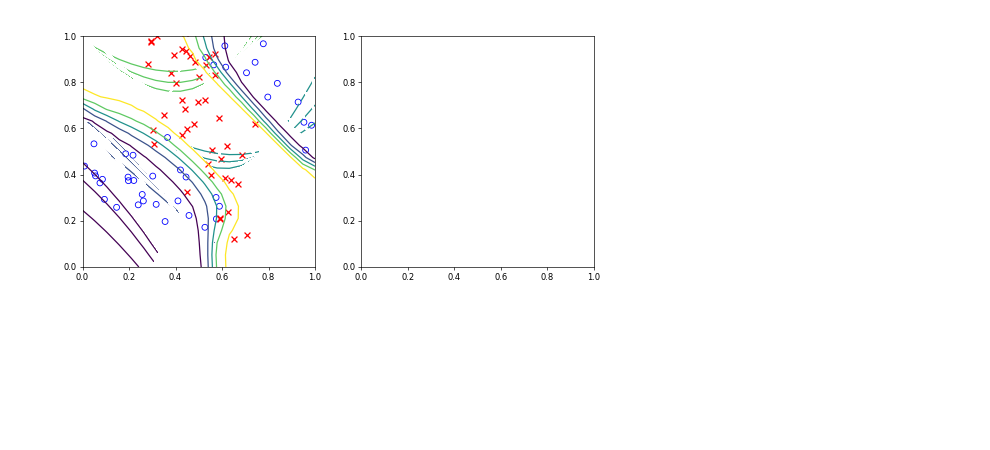

KeyboardInterrupt: 

In [4]:
# for showing iteratively
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import warnings

# convert warnings to error
warnings.filterwarnings("error")

TRAIN_FINISHED = 100000

LT = 10000
LR = 0.1
X = None
Y = None
x = None
y = None
cont = None
levels = None

Gaussian = lambda t, mu, sigma: 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-(t-mu)**2/(2*sigma**2))

def tanh(a):
    y = np.tanh(a)
    return y

def dtanh(o):
    y = 1-o**2
    return y

def sigmoid(a):
    y = 1.0/(1.0+np.exp(-a))
    return y

def dsigmoid(o):
    y = o*(1-o)
    return y

def compute_weights_error(derivatives, variance):
    ret = LR * variance * derivatives
    return ret

class Layer:
    network = None
    unit_number = 0
    outputs = None
    errors = None
    weights = None
    derivatives = None
    prev_layer = None
    next_layer = None
    variance = 0.0
#     bias = None
#     bias_derivatives = None
    
    w_start = 0
    b_start = 0
    act_errors = None
    
    act_func = tanh
    link_func = dtanh
    
    def __init__(self, K, afunc=tanh, lfunc=dtanh):
        self.unit_number = K
        self.outputs = np.zeros(K)
        self.errors = np.zeros(K)
        self.act_errors = np.zeros(K)
#         self.bias = np.zeros(K)
#         self.bias_derivatives = np.zeros(K)
        self.act_func = afunc
        self.link_func = lfunc
        
    def build_connection(self, network):
        self.network = network
        j = self.prev_layer.unit_number
        self.variance = 1.0/(j * self.unit_number)
#         self.weights = np.random.normal(0,\
#                                         np.sqrt(self.variance),\
#                                         (self.unit_number, j))
#         self.derivatives = np.zeros((self.unit_number, j))
        
        w_size = self.unit_number * j
        self.w_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.random.normal(0, np.sqrt(self.variance), w_size)))
        self.network.w_size += w_size
        
        b_size = self.unit_number
        self.b_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.zeros(b_size)))
        self.network.w_size += b_size
        
        self.network.derivatives = np.zeros(self.network.w_size)
        self.network.hessian = np.zeros((self.network.w_size, self.network.w_size))
        self.network.b = np.zeros(self.network.w_size)
    
#     def forward_propagation(self):
#         for k in range(self.unit_number):
#             self.outputs[k] = self.act_func(np.sum(self.prev_layer.outputs * self.weights[k])+self.bias[k])

    def forward_propagation(self):
        for k in range(self.unit_number):
            s = 0.0
            for j in range(self.prev_layer.unit_number):
                s += self.prev_layer.outputs[j] * self.network.weights[self.w_start+k*self.prev_layer.unit_number+j]
            s += self.network.weights[self.b_start + k]
            self.outputs[k] = self.act_func(s)
            
#     def backward_propagation(self, update_weight):
#         for k in range(self.unit_number):
#             self.errors[k] = self.link_func(self.outputs[k]) * np.sum(self.next_layer.weights[:,k] * self.next_layer.errors)
#             self.derivatives[k] += self.errors[k] * self.prev_layer.outputs
#         self.bias_derivatives += self.errors
#         if update_weight == 1:
#             self.weights -= compute_weights_error(self.derivatives, self.variance)
#             self.derivatives *= 0.0
#             self.bias -= compute_weights_error(self.bias_derivatives, self.variance)
#             self.bias_derivatives *= 0.0

    def backward_propagation(self, update_weight):
        for k in range(self.unit_number):
            s = 0.0
            a = 0.0
            for l in range(self.next_layer.unit_number):
                s += self.next_layer.errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
                a += self.next_layer.act_errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
            self.errors[k] = self.link_func(self.outputs[k]) * s
            self.act_errors[k] = self.link_func(self.outputs[k]) * a
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def dump(self):
        print("outputs {}".format(self.outputs))
        print("errors {}".format(self.errors))
        print("weights {}".format(self.weights))
        print("derivatives {}".format(self.derivatives))

# Mixture Gaussian Parameters Layer
class OutputLayer(Layer):
    targets = None
#     def backward_propagation(self, update_weight):
#         self.errors = self.outputs-self.targets
#         for k in range(self.unit_number):
#             self.derivatives[k] += self.errors[k] * self.prev_layer.outputs
#         self.bias_derivatives += self.errors
#         if update_weight == 1:
#             self.weights -= compute_weights_error(self.derivatives, self.variance)
#             self.derivatives *= 0.0
#             self.bias -= compute_weights_error(self.bias_derivatives, self.variance)
#             self.bias_derivatives *= 0.0
            
    def backward_propagation(self, update_weight):
        self.errors = self.outputs-self.targets
        self.act_errors = np.ones(self.act_errors.shape)
        for k in range(self.unit_number):
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def update_target(self, t):
        self.targets = t

class InputLayer(Layer):
    outputs = None
    unit_number = 0
    prev_layer = None
    next_layer = None
    
    def __init__(self, K):
        self.unit_number = K
        
    def build_connection(self, network):
        self.network = network
        return
        
    def update_input(self, inputs):
        self.outputs = inputs

class Network:
    input_layer = None
    output_layer = None
    inputs = None
    targets = None
    hessian = None
    weights = None
    derivatives = None
    b = None
    w_size = 0
    q0 = None
    
    def __init__(self):
        self.weights = np.array([])
        return
    
    def add_layer(self, layer):
        if self.input_layer == None:
            self.input_layer = layer
        else:
            layer.prev_layer = self.output_layer
            self.output_layer.next_layer = layer
            
        self.output_layer = layer
        layer.build_connection(self)
        
    def update(self, update_weight):
        b = self.b.reshape(-1, 1)
        y = self.output_layer.outputs[0]
        self.hessian += y * (1-y) * (b @ b.T)
        if update_weight == 1:
            if np.allclose(self.derivatives, np.zeros(self.w_size)):
                return TRAIN_FINISHED
            #print(self.weights)
            #print(self.derivatives)
            #print(self.hessian)
            #print(np.linalg.inv(self.hessian))
            # Conjugate Gradients approach
            q0 = self.q0
            if q0 is None:
                q1 = -self.derivatives
            else:
                denominator = q0 @ self.hessian @ q0
                if denominator == 0:
                    return TRAIN_FINISHED
                numerator = q0 @ self.hessian @ self.derivatives
                q1 = -self.derivatives + numerator/denominator * q0
            self.weights += 0.01 * q1
            self.q0 = q1
            self.derivatives *= 0
            self.hessian *= 0
        return 1
        
    def train(self, observations, targets):
        N = len(observations)
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            
            # gradient descent/stotastic gradient descent
            if n == N-1:
                update_weight = 1
            else:
                update_weight = 0
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation(update_weight)
                layer = layer.prev_layer
            if self.update(update_weight)==TRAIN_FINISHED:
                return TRAIN_FINISHED

    def Get_Error(self, observations, targets, show):
        N = len(observations)
        es = 0.0
        for n in range(N):
            self.inputs = observations[n]
            self.targets = targets[n]
            
            layer = self.input_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            #print("target {}".format(self.targets))
            #print("output {}".format(self.output_layer.outputs))
            #e = np.sum(self.targets * np.log(self.output_layer.outputs))
            # for sigmoid only
            e = self.targets[0] * np.log(self.output_layer.outputs[0]) \
                + (1 - self.targets[0]) * np.log(1 - self.output_layer.outputs[0])
            es += e
            if show == 1:
                print(self.targets, self.output_layer.outputs)
        return -es
                
    def test(self, new_input):
        self.input_layer.update_input(new_input)
        
        layer = self.input_layer.next_layer
        while layer != None:
            layer.forward_propagation()
            layer = layer.next_layer
        return self.output_layer.outputs
    
    def dump(self):
        layer = self.input_layer.next_layer
        while layer != None:
            layer.dump()
            layer = layer.next_layer
        return

def gen_training_data(ax):
    mean1 = [0.2, 0.4]
    cov1 = [[0.04, -0.02], 
           [-0.02, 0.02]]
    X1 = np.random.multivariate_normal(mean1, cov1, 30)

    mean12 = [0.8, 0.8]
    cov12 = [[0.04, -0.02], 
           [-0.02, 0.02]]
    X12 = np.random.multivariate_normal(mean12, cov12, 20)
    X1 = np.vstack((X1, X12))
    T1 = np.zeros(len(X1))
    
    mean2 = [0.5, 0.7]
    cov2 = [[0.02, -0.03], 
           [-0.03, 0.1]]
    X2 = np.random.multivariate_normal(mean2, cov2, 50)
    T2 = np.ones(len(X2))
    
    ax.scatter(X1.T[0], X1.T[1], s=50,  facecolors='none', edgecolors='blue')
    ax.scatter(X2.T[0], X2.T[1], s=50,  facecolors='red', edgecolors='none', marker='x')
    
    X = np.vstack((X1, X2))
    T = np.hstack((T1, T2))
    return X, T

def show_pic(network, ax, fig, init=0):
    global x, y, X, Y, Z, cont, levels
    if init == 1:
        x = np.linspace(0,1,20)
        y = np.linspace(0,1,20)
        X, Y = np.meshgrid(x, y)
        levels = np.arange(0.1, 1.1, 0.2)
    
    Z = np.zeros(X.shape)
    for i in range(len(y)):
        for j in range(len(x)):
            Z[i][j] = network.test([x[j], y[i]])
    if init != 1:
        for coll in cont.collections: 
            coll.remove()
    cont = ax.contour(X, Y, Z, levels=levels) 
    fig.canvas.draw()

def training_show_process(network, X, T, fig, ax):
    show_pic(network, ax, fig, 1)

    for i in range(LT):
        ret = network.train(X, T)
        if i % 10 == 9 or ret == TRAIN_FINISHED:
            show_pic(network, ax, fig)
    return

def build_network():
    network = Network()
    ilayer = InputLayer(2)
    network.add_layer(ilayer)
    layer1 = Layer(8)
    network.add_layer(layer1)
    olayer = OutputLayer(1, sigmoid, dsigmoid)
    network.add_layer(olayer)
    return network

def main():
    fig = plt.figure(figsize=(11,5), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    X, T = gen_training_data(ax1)
    network = build_network()
    training_show_process(network, X, T, fig, ax1)

if __name__=="__main__":
    main()